In [1]:
import pandas as pd
df= pd.read_csv("Small.csv")

In [2]:
df.head()

,RecipeId,Name,RecipeCategory,Calories,FatContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,41,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,536.1,24.0,64.2,17.3,32.1,29.3
1,42,Cabbage Soup,Vegetable,103.6,0.4,25.1,4.8,17.7,4.3
2,46,A Jad - Cucumber Pickle,Vegetable,4.3,0.0,1.1,0.2,0.2,0.1
3,47,Butter Pecan Cookies,Dessert,69.0,5.6,4.5,0.6,1.6,0.8
4,50,Biscotti Di Prato,Dessert,89.4,2.6,14.5,0.8,7.3,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129360 entries, 0 to 129359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             129360 non-null  int64  
 1   Name                 129360 non-null  object 
 2   RecipeCategory       129360 non-null  object 
 3   Calories             129360 non-null  float64
 4   FatContent           129360 non-null  float64
 5   CarbohydrateContent  129360 non-null  float64
 6   FiberContent         129360 non-null  float64
 7   SugarContent         129360 non-null  float64
 8   ProteinContent       129360 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.9+ MB


In [16]:
# Check for missing or null values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

RecipeId               0
Name                   0
RecipeCategory         0
Calories               0
FatContent             0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
dtype: int64


In [4]:
from scipy import stats
import pandas as pd



# Calculate the Z-scores
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Convert the Z-scores to a DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include='number').columns)

# Identify the rows with any Z-score greater than 3 or less than -3
outliers = df[(z_scores_df > 3).any(axis=1) | (z_scores_df < -3).any(axis=1)]

# Show the first few rows of the outliers
print(outliers.head())


     RecipeId                              Name  RecipeCategory  Calories  \
0          41    Carina's Tofu-Vegetable Kebabs        Soy/Tofu     536.1   
38        161            Chicken in Pizza Dough  Chicken Breast     545.0   
49        194  Classic Chicken and Coconut Soup  Chicken Breast     587.8   
56        219           Chocolate Zucchini Cake         Dessert     552.1   
138       468                      Maple Salmon    High Protein     561.8   

     FatContent  CarbohydrateContent  FiberContent  SugarContent  \
0          24.0                 64.2          17.3          32.1   
38          5.9                 97.3           3.9           1.4   
49         52.0                 11.8           0.1           0.9   
56         22.1                 87.0           2.5          68.3   
138        14.1                 37.2           0.3          32.3   

     ProteinContent  
0              29.3  
38             22.8  
49             24.5  
56              5.9  
138            69.

In [5]:
# Remove the rows with any Z-score greater than 3 or less than -3
no_outliers = df[(z_scores_df <= 3).all(axis=1) & (z_scores_df >= -3).all(axis=1)]

# Show the first few rows of the data without outliers
print(no_outliers.head())

   RecipeId                     Name RecipeCategory  Calories  FatContent  \
1        42             Cabbage Soup      Vegetable     103.6         0.4   
2        46  A Jad - Cucumber Pickle      Vegetable       4.3         0.0   
3        47     Butter Pecan Cookies        Dessert      69.0         5.6   
4        50        Biscotti Di Prato        Dessert      89.4         2.6   
5        53    Jimmy G's Carrot Cake        Dessert     372.9        10.6   

   CarbohydrateContent  FiberContent  SugarContent  ProteinContent  
1                 25.1           4.8          17.7             4.3  
2                  1.1           0.2           0.2             0.1  
3                  4.5           0.6           1.6             0.8  
4                 14.5           0.8           7.3             2.3  
5                 66.2           3.4          40.9             6.6  


In [9]:
no_outliers.head()

,RecipeId,Name,RecipeCategory,Calories,FatContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
1,42,Cabbage Soup,Vegetable,103.6,0.4,25.1,4.8,17.7,4.3
2,46,A Jad - Cucumber Pickle,Vegetable,4.3,0.0,1.1,0.2,0.2,0.1
3,47,Butter Pecan Cookies,Dessert,69.0,5.6,4.5,0.6,1.6,0.8
4,50,Biscotti Di Prato,Dessert,89.4,2.6,14.5,0.8,7.3,2.3
5,53,Jimmy G's Carrot Cake,Dessert,372.9,10.6,66.2,3.4,40.9,6.6


In [10]:
filtered_data = no_outliers[no_outliers['Calories'] < 300]

In [11]:
filtered_data.head()

,RecipeId,Name,RecipeCategory,Calories,FatContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
1,42,Cabbage Soup,Vegetable,103.6,0.4,25.1,4.8,17.7,4.3
2,46,A Jad - Cucumber Pickle,Vegetable,4.3,0.0,1.1,0.2,0.2,0.1
3,47,Butter Pecan Cookies,Dessert,69.0,5.6,4.5,0.6,1.6,0.8
4,50,Biscotti Di Prato,Dessert,89.4,2.6,14.5,0.8,7.3,2.3
7,59,Lou's Fabulous Bruschetta,Vegetable,221.5,6.5,32.5,2.5,1.8,8.1


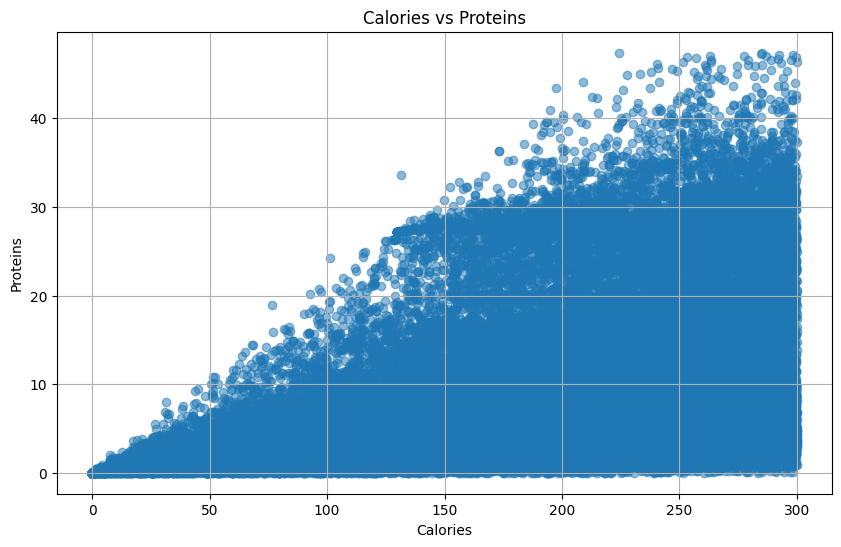

In [13]:

import matplotlib.pyplot as plt



# Create a scatter plot of calories versus proteins
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Calories'], filtered_data['ProteinContent'], alpha=0.5)
plt.title('Calories vs Proteins')
plt.xlabel('Calories')
plt.ylabel('Proteins')
plt.grid(True)
plt.show()


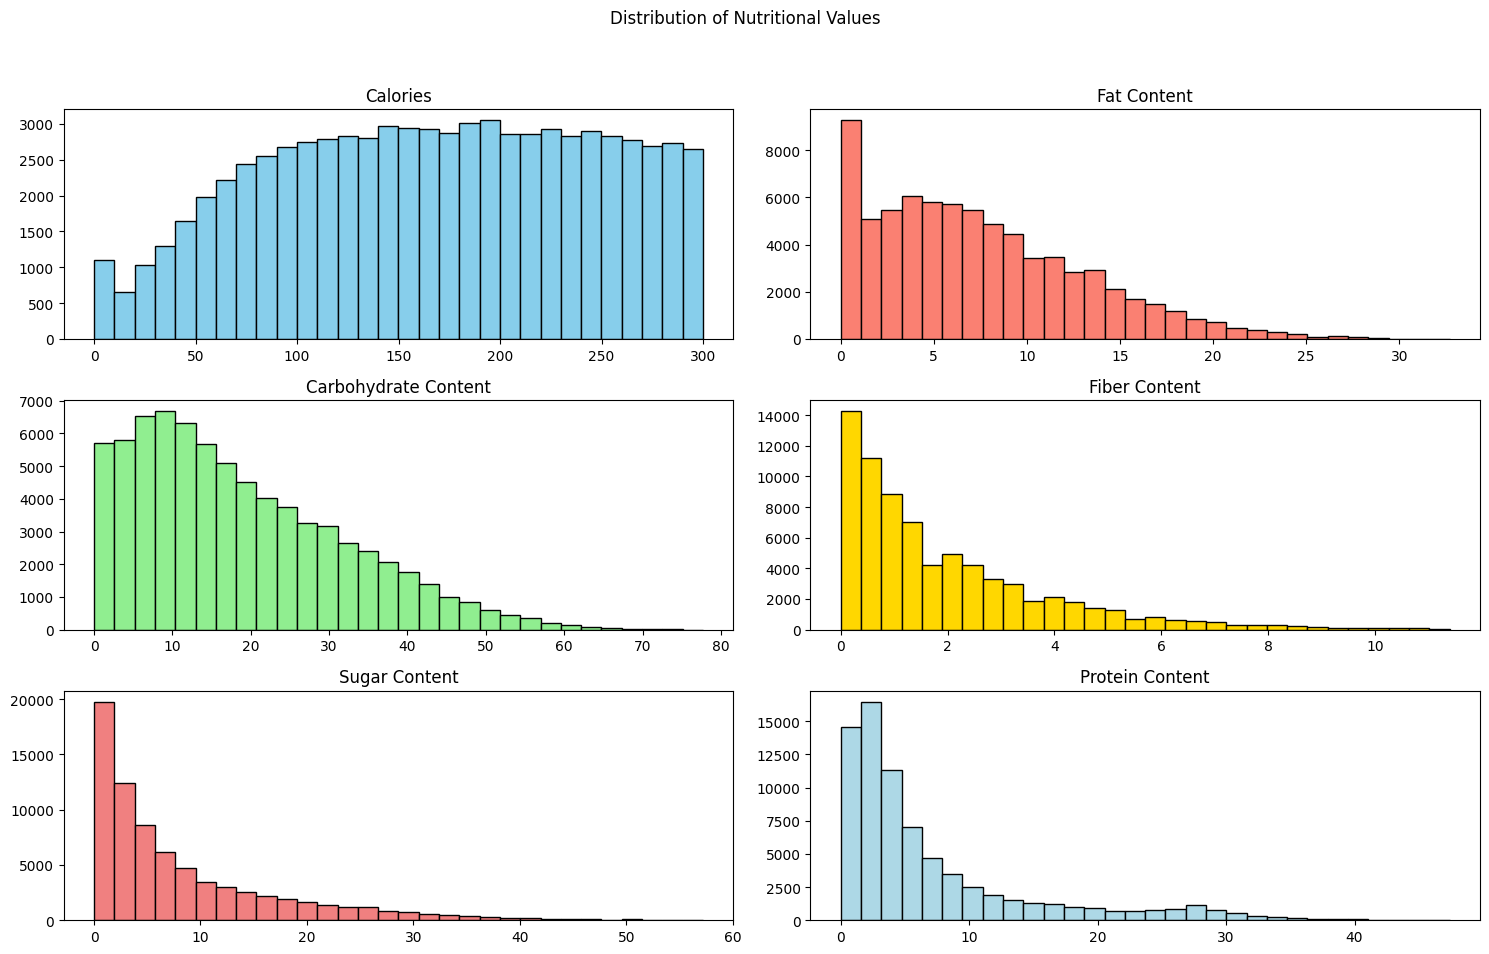

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Create histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Nutritional Values')

# Histogram of calories
axes[0, 0].hist(filtered_data['Calories'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Calories')

# Histogram of fat content
axes[0, 1].hist(filtered_data['FatContent'], bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_title('Fat Content')

# Histogram of carbohydrate content
axes[1, 0].hist(filtered_data['CarbohydrateContent'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Carbohydrate Content')

# Histogram of fiber content
axes[1, 1].hist(filtered_data['FiberContent'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Fiber Content')

# Histogram of sugar content
axes[2, 0].hist(filtered_data['SugarContent'], bins=30, color='lightcoral', edgecolor='black')
axes[2, 0].set_title('Sugar Content')

# Histogram of protein content
axes[2, 1].hist(filtered_data['ProteinContent'], bins=30, color='lightblue', edgecolor='black')
axes[2, 1].set_title('Protein Content')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [18]:
filtered_data.to_csv("Calories.csv", index=False)